In [19]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#безрисковые облигации -- Германия 13.03.2020 16:38
s0_q = -0.773*1e-2
s0_h = -0.825*1e-2
s0_tq = -0.921*1e-2
s0_1 = -0.903*1e-2
s0_2 = -0.941*1e-2
s0_3 = -0.937*1e-2
s0_4 = -0.855*1e-2
s0_5 = -0.789*1e-2
s0_6 = -0.780*1e-2
s0_7 = -0.751*1e-2
s0_8 = -0.681*1e-2
s0_9 = -0.627*1e-2
s0_10 = -0.578*1e-2

#рискованный эмитент -- Италия 13.03.2020 16:38
s1_q = -0.129*1e-2
s1_h = 0.077*1e-2
s1_tq = 0.188*1e-2
s1_1 = 0.256*1e-2
s1_2 = 0.659*1e-2
s1_3 = 0.883*1e-2
s1_4 = 1.094*1e-2
s1_5 = 1.189*1e-2
s1_6 = 1.325*1e-2
s1_7 = 1.356*1e-2
s1_8 = 1.465*1e-2
s1_9 = 1.655*1e-2
s1_10 = 1.697*1e-2

#recovery rate
R = 0.4

def defProb(T, risky, safe, R):
    tmp = (1+safe)/(1+risky)
    return (1-tmp**T)/(1 - R)

tenors = [0,0.25, 0.5, 0.75,1,2,3,4,5,6,7,8,9,10]
probs = [0]
probs.append(defProb(0.25, s1_q, s0_q, R))
probs.append(defProb(0.5, s1_h, s0_h, R))
probs.append(defProb(0.75, s1_tq, s0_tq, R))
probs.append(defProb(1, s1_1, s0_1, R))
probs.append(defProb(2, s1_2, s0_2, R))
probs.append(defProb(3, s1_3, s0_3, R))
probs.append(defProb(4, s1_4, s0_4, R))
probs.append(defProb(5, s1_5, s0_5, R))
probs.append(defProb(6, s1_6, s0_6, R))
probs.append(defProb(7, s1_7, s0_7, R))
probs.append(defProb(8, s1_8, s0_8, R))
probs.append(defProb(9, s1_9, s0_9, R))
probs.append(defProb(10, s1_10, s0_10, R))

probs

[0,
 0.0026933208533510187,
 0.007527883997781223,
 0.013855721094927683,
 0.01926734227045405,
 0.05256306936487228,
 0.08858595475896033,
 0.12485795456419702,
 0.1566513058528916,
 0.19725186133920047,
 0.22791616768623976,
 0.26198673621737667,
 0.3080227239988109,
 0.337460689595294]

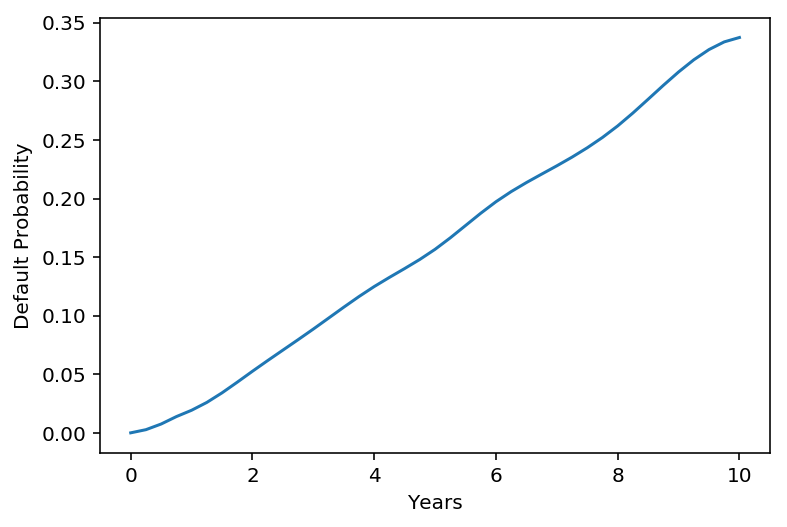

In [29]:
xnew = np.linspace(0, 10, num=41)
intDefProb = interp1d(tenors, probs, kind = 'cubic')
y = intDefProb(xnew)
plt.plot(xnew,y,label = 'Default probability')
plt.xlabel("Years")
plt.ylabel("Default Probability")
plt.show()

## Рассчитаем оптимальный купон:


\begin{align}
\frac{x}{4} \sum\limits_{i = 1}^{40} S(\frac{i}{4}) = (1 - R)(1-S(10))\\
x = \frac{4 (1 - R)(1-S(10))}{\sum\limits_{i = 1}^{40} S(\frac{i}{4})}\\
\end{align}

In [21]:
sumProb = 0
for i in range(1,41):
    sumProb += (1 - intDefProb(i*0.25))
x = (4*(1 - R)*intDefProb(10))/sumProb
x

0.024242621050728063

In [22]:
import csv

with open('payouts.csv', 'wb') as table:
    writer = csv.DictWriter(table, fieldnames = ["Tenor", "Buyer", "Buyer Probability", "Seller", "Seller Probability"], delimiter = ',')
    writer.writeheader()

In [23]:
import pandas as pd
infile='payouts.csv'
df=pd.read_csv(infile)

for i in xnew[1:]:
    df.loc[i] = [i, x/4, 1 - intDefProb(i), 1 - R, intDefProb(i) - intDefProb(i-0.25)]
    
df.to_csv('payouts.csv')
df

,Tenor,Buyer,Buyer Probability,Seller,Seller Probability
0.25,0.25,0.006061,0.997307,0.6,0.002693
0.50,0.50,0.006061,0.992472,0.6,0.004835
0.75,0.75,0.006061,0.986144,0.6,0.006328
1.00,1.00,0.006061,0.980733,0.6,0.005412
1.25,1.25,0.006061,0.974056,0.6,0.006676
1.50,1.50,0.006061,0.965865,0.6,0.008192
1.75,1.75,0.006061,0.956783,0.6,0.009082
2.00,2.00,0.006061,0.947437,0.6,0.009346
2.25,2.25,0.006061,0.938319,0.6,0.009118
2.50,2.50,0.006061,0.929390,0.6,0.008929
